In [11]:
import tensorflow as tf

print(tf.__version__)

2.17.0


# Tensorflow Variable Examples

In [14]:
a = tf.constant([[1, 2],
                 [3, 4]])
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [16]:
# Broadcasting support
b = tf.add(a, 1)
print(b)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [18]:
# Operator overloading is supported
print(a * b)

tf.Tensor(
[[ 2  6]
 [12 20]], shape=(2, 2), dtype=int32)


In [20]:
# Can specify a data type for tf variables
a = tf.constant(3.0, dtype=tf.float32)
b = tf.constant(4.0, dtype=tf.float32)

c = a+b
print(c)

tf.Tensor(7.0, shape=(), dtype=float32)


In [22]:
# Use NumPy values
import numpy as np

c = np.multiply(a, b)
print(c)
print(type(c))

12.0
<class 'numpy.float32'>


In [24]:
# Obtain numpy value from a tensor:
print(a.numpy())
print(type(a))
print(type(a.numpy()))

3.0
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.float32'>


# Simple Neural Network with Keras

(10000, 1)
(10000, 1)


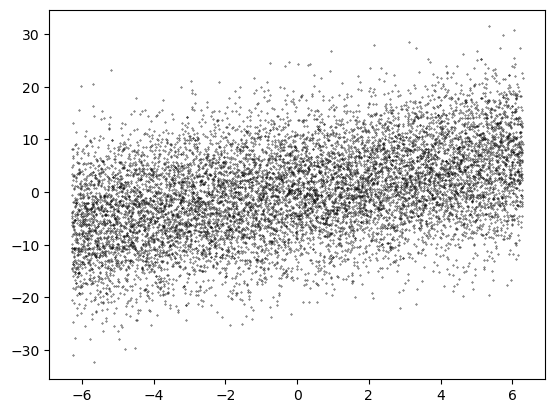

In [27]:
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
outputs = inputs + 8 * np.random.normal(size=[len(inputs),1])
print(inputs.shape)
print(outputs.shape)
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')

In [29]:
# Create a linear model
linear_model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [31]:
# Get results from an untrained model
linear_predictions = linear_model(inputs)
print(linear_predictions)

tf.Tensor(
[[-6.8340096]
 [-6.8326426]
 [-6.8312755]
 ...
 [ 6.8312755]
 [ 6.8326426]
 [ 6.8340096]], shape=(10000, 1), dtype=float32)


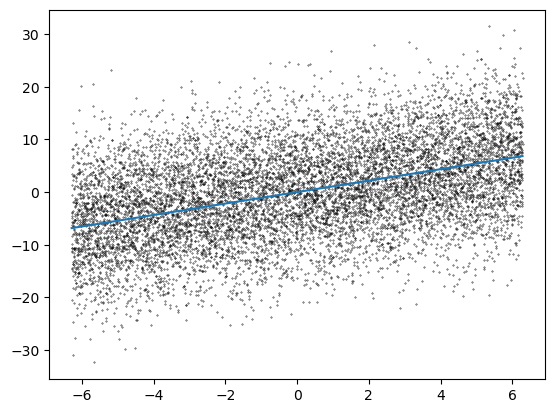

In [33]:
# Plot the untrained results
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')
plt.plot(inputs[:, 0], linear_predictions[:, 0])

In [35]:
# Get Loss from library
example_loss = tf.keras.losses.MeanSquaredError()
# Compile the model with an optimizer
linear_model.compile(optimizer='SGD',
                     loss=example_loss,
                     metrics=['mean_squared_error'])

In [37]:
linear_model.fit(inputs,outputs,epochs=2)

Epoch 1/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 157us/step - loss: 64.6698 - mean_squared_error: 64.6698
Epoch 2/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 139us/step - loss: 62.8419 - mean_squared_error: 62.8419


In [39]:
linear_predict = linear_model.predict(inputs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 172us/step


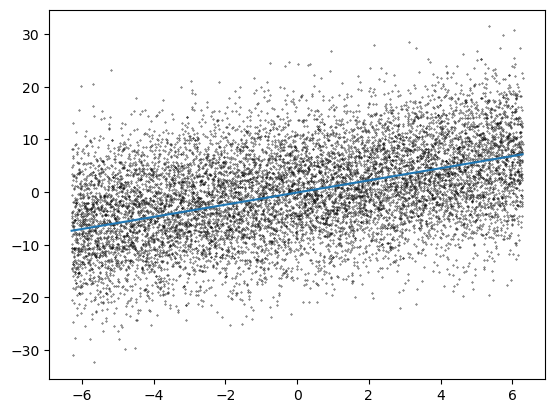

In [41]:
# Plot the trained results
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')
plt.plot(inputs[:, 0], linear_predict[:, 0])

## Utilizing a more Complecated Example

(10000, 1)
(10000, 1)


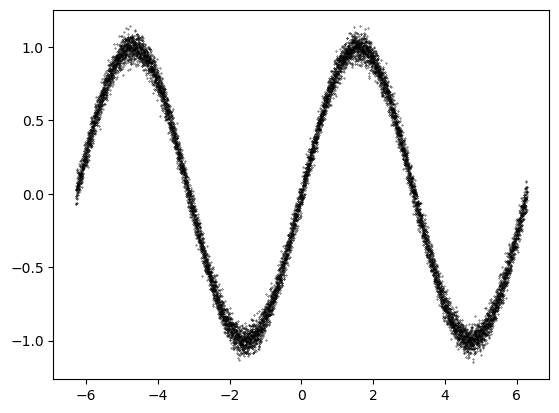

In [44]:
# Input data
import numpy as np
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
outputs = np.sin(inputs) + 0.05 * np.random.normal(size=[len(inputs),1])
print(inputs.shape)
print(outputs.shape)
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')

In [46]:
# Create a linear model
linear_model = tf.keras.Sequential([tf.keras.layers.Dense(1,"sigmoid")])

In [48]:
# Get results from an untrained model
linear_predictions = linear_model(inputs)
print(linear_predictions)

tf.Tensor(
[[9.9966073e-01]
 [9.9966019e-01]
 [9.9965966e-01]
 ...
 [3.4036473e-04]
 [3.3982145e-04]
 [3.3927910e-04]], shape=(10000, 1), dtype=float32)


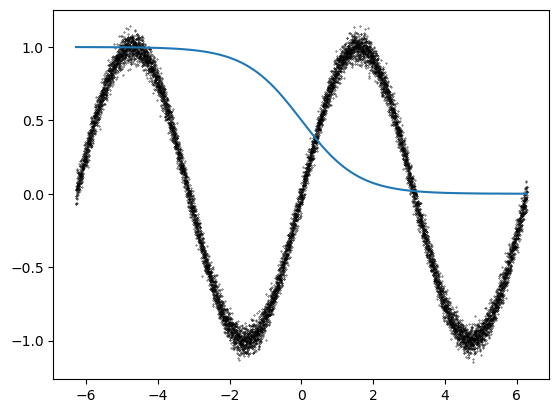

In [50]:
# Plot the untrained results
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')
plt.plot(inputs[:, 0], linear_predictions[:, 0])

In [52]:
# Compile the model with an optimizer
linear_model.compile(optimizer='SGD',
                     loss=example_loss,
                     metrics=['mean_squared_error'])
linear_model.fit(inputs,outputs,epochs=2)
linear_predict = linear_model.predict(inputs)

Epoch 1/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 154us/step - loss: 0.8163 - mean_squared_error: 0.8163
Epoch 2/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 140us/step - loss: 0.6719 - mean_squared_error: 0.6719
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 155us/step


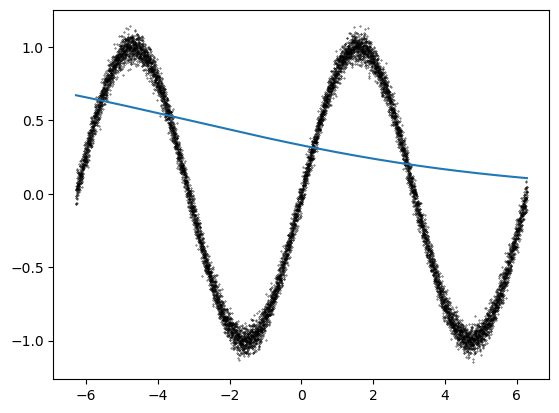

In [54]:
# Plot the trained results
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')
plt.plot(inputs[:, 0], linear_predict[:, 0])

Basic layer is linear, can change activation to see different outputs

Arguments when initalizing a dense layer
tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)

Train Example

In [59]:
inputs

array([[-6.28318531],
       [-6.28192854],
       [-6.28067178],
       ...,
       [ 6.28067178],
       [ 6.28192854],
       [ 6.28318531]])

In [63]:
inputs.shape

(10000, 1)

In [23]:
# Create a Deep Model
sample_model = tf.keras.Sequential([
                                    tf.keras.layers.Dense(16,activation='sigmoid',input_shape=[1,]),
                                    tf.keras.layers.Dense(16,activation='relu'),
                                    tf.keras.layers.Dense(1)
                                    ])

In [24]:
# Compile the model with an optimizer
sample_model.compile(optimizer='adam',
                     loss=example_loss,
                     metrics=['mean_squared_error'])

In [25]:
# Can print out the details of the model after compileing
sample_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                32        
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [26]:
sample_model.fit(inputs,outputs,epochs=5)

Epoch 1/5
313/313 [==============================] - 1s 1ms/step - loss: 0.4069 - mean_squared_error: 0.4069
Epoch 2/5
313/313 [==============================] - 0s 724us/step - loss: 0.2705 - mean_squared_error: 0.2705
Epoch 3/5
313/313 [==============================] - 0s 749us/step - loss: 0.1563 - mean_squared_error: 0.1563
Epoch 4/5
313/313 [==============================] - 0s 2ms/step - loss: 0.1082 - mean_squared_error: 0.1082
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0935 - mean_squared_error: 0.0935


In [27]:
sample_predict = sample_model.predict(inputs)

313/313 [==============================] - 0s 872us/step


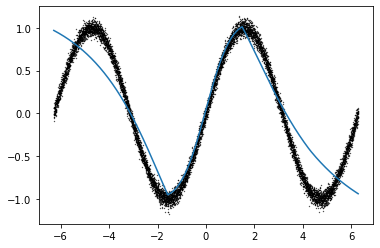

In [28]:
# Plot the untrained results
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')
plt.plot(inputs[:, 0], sample_predict[:, 0])